In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [2]:
import wandb
# Import Essential Libraries
import os
import shutil
import random
import pandas as pd
from PIL import Image
import cv2
import yaml
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid')

import pathlib
import glob
import warnings
warnings.filterwarnings('ignore')

# ورود به Weights & Biases
wandb.login(key='fb34c333b00d4736d6be52fd6865d28800975566')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
# Load a pretrained YOLOv8n model from Ultralytics
Vio_Model = YOLO("yolov9e.pt")

100%|██████████| 112M/112M [00:00<00:00, 231MB/s]  


In [6]:
#### Train the model on our custom dataset
yaml_file_path = '/kaggle/input/helmet/HelmetViolationsV2/data.yaml'
results = Vio_Model.train(
    data= yaml_file_path,     # Path to the dataset configuration file
    epochs=100,                # Number of epochs to train for
    #imgsz=640,               # Size of input images as integer
    #device= '1',             # Device to run on, i.e. cuda device=1,2,3,4
    #patience=20,             # Epochs to wait for no observable improvement for early stopping of training
    batch= -1,               # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
                  # Random seed for reproducibility
    dropout = 0.2,             # Use dropout regularization
)

Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/input/helmet/HelmetViolationsV2/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning /kaggle/input/helmet/HelmetViolationsV2/train/labels... 963 images, 0 backgrounds, 0 corrupt: 100%|██████████| 963/963 [00:04<00:00, 214.41it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 2.77G reserved, 1.39G allocated, 10.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    58147225       192.7         2.829         110.8         61.95        (1, 3, 640, 640)                    list
    58147225       385.4         3.949         106.7         93.09        (2, 3, 640, 640)                    list
    58147225       770.7         6.300         149.1         164.9        (4, 3, 640, 640)                    list
    58147225        1541        10.

train: Scanning /kaggle/input/helmet/HelmetViolationsV2/train/labels... 963 images, 0 backgrounds, 0 corrupt: 100%|██████████| 963/963 [00:01<00:00, 487.91it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/helmet/HelmetViolationsV2/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 208.61it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.02G       1.66      2.385       1.86          7        640: 100%|██████████| 241/241 [01:56<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all         30         38      0.858      0.156      0.163     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.68G      1.854      2.307      2.068          5        640: 100%|██████████| 241/241 [01:50<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         30         38      0.894      0.167      0.226       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.67G      1.839        2.3      2.026         11        640: 100%|██████████| 241/241 [01:49<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         30         38      0.847      0.211      0.329       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.02G      1.779      2.239      1.986          2        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.976      0.167       0.31      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.03G        1.7      2.103      1.928          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         30         38      0.755     0.0778      0.138     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.66G      1.638      2.055      1.858          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38       0.87      0.267      0.376      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.66G      1.638      1.942      1.874          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.934      0.233      0.393      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.01G       1.56      1.836      1.754          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.927      0.237      0.374      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.65G      1.548      1.815      1.771          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all         30         38      0.556      0.656      0.507       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.01G      1.534      1.715       1.75          1        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.324      0.511      0.424      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.02G       1.48      1.681      1.696          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.226      0.389      0.447      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.67G      1.444      1.664      1.678          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         30         38      0.626      0.667       0.56      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.62G      1.416      1.565      1.655          3        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.828      0.222      0.324      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.72G      1.437      1.567      1.665          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.512      0.495      0.573      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.71G      1.436      1.575       1.68         10        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38       0.49      0.689      0.631      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.68G      1.391      1.528      1.629          8        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.361      0.578      0.489      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.67G      1.408      1.487      1.658          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38       0.36      0.609      0.563      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.65G      1.377        1.5      1.607         10        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.419      0.713      0.635      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.03G      1.402       1.46      1.615         10        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.386      0.467      0.527      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.66G      1.379      1.482       1.62          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.496      0.514      0.625      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.66G      1.334      1.419      1.594          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.354      0.522      0.599      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.01G       1.34      1.351      1.595         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.458      0.689      0.596      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.02G       1.34      1.373       1.59          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.447      0.851      0.653      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.02G      1.343      1.348      1.567          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.469      0.618      0.639      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.66G      1.315      1.318      1.553          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.378      0.689      0.576      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.67G      1.285       1.32       1.55          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.366      0.744      0.572       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.65G       1.28      1.277      1.538          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38       0.46      0.822      0.671      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.01G      1.261      1.263      1.519         12        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.387      0.644      0.573      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.62G      1.241      1.251      1.507          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.684      0.578      0.665      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.72G      1.284      1.245      1.523          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.946      0.405      0.637      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.71G      1.261      1.248      1.539          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.449      0.622      0.578      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.68G      1.222      1.249      1.492          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         30         38      0.546      0.822      0.677      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.67G      1.262       1.24      1.527          8        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.422      0.644      0.667      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.03G      1.234      1.198      1.491          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.431      0.763      0.668      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.66G      1.236      1.212      1.506          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.611      0.636      0.701      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.65G      1.205       1.23      1.477          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38       0.79      0.774      0.758      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.65G      1.178      1.164      1.455          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.678      0.689      0.645       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.65G      1.237      1.185      1.491          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.955      0.454      0.634      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.03G      1.215      1.197      1.478          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.633      0.769      0.742      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.03G      1.203      1.151      1.474         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.639      0.644      0.738      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.03G      1.176      1.124       1.47          8        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.475      0.789      0.682      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.67G      1.192      1.162      1.461         10        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.504      0.689       0.65      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.03G      1.168      1.135      1.447         13        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.621      0.701        0.7      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.03G      1.166      1.114      1.447          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         30         38      0.645      0.578      0.639      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.63G      1.165      1.138      1.448         12        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38       0.81      0.689      0.805      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       7.5G      1.147      1.115       1.43         13        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.852      0.522       0.62      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.71G      1.175      1.124      1.446          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.534      0.958      0.741       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.68G      1.146       1.09      1.422          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.835      0.721      0.788      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.67G      1.131      1.108      1.425          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.779      0.713        0.8        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.66G      1.116      1.049      1.402         12        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.866      0.651       0.82      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.65G      1.129       1.06      1.404          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.695      0.822      0.797      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.03G      1.127      1.059      1.408          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.826      0.739      0.831      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.65G      1.104      1.023      1.402          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.793      0.811      0.818      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.66G      1.115      1.037      1.386          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.697      0.863      0.813       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         7G      1.111     0.9983       1.41          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.705      0.667      0.731      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.98G      1.068     0.9765      1.368          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.772      0.775      0.801      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.99G      1.055     0.9907      1.364          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.922      0.736      0.858      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.03G      1.072      1.023      1.381          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.889      0.701      0.867       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.02G      1.067     0.9699      1.366          8        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.614      0.794       0.75      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.65G      1.111      1.046      1.402         12        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.796      0.773      0.834      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.03G       1.07     0.9901      1.382          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38       0.69      0.807      0.782      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       7.7G      1.036     0.9563      1.356          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.715      0.809      0.794      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.71G      1.039      0.958      1.349          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.696      0.817      0.743      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.68G      1.034     0.9523      1.349          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.684      0.822      0.773       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.66G      1.023     0.9158       1.33         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.842      0.771      0.801      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.65G      1.046     0.9537      1.352         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38       0.79      0.815      0.815      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.01G      1.033      0.934      1.326          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.687      0.882      0.832      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.65G      1.032     0.9304      1.344          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.769      0.976        0.9      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.65G      1.017     0.9052       1.32         12        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.814      0.811      0.837      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.02G      1.005     0.8849      1.325          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.658      0.818      0.768      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.02G      1.011     0.9011      1.319          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.728      0.756      0.798      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.02G      0.996     0.8872      1.309          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.738      0.811      0.837      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.66G     0.9991     0.8805      1.323          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         38      0.674      0.822      0.765      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.66G          1     0.8905      1.301          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.712      0.811      0.809      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.64G     0.9697     0.8724      1.286          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.783      0.852       0.83       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.62G     0.9804     0.8752        1.3         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         30         38      0.677      0.822      0.865      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.02G     0.9679     0.8554      1.289          8        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.775      0.822      0.814      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       7.5G     0.9531     0.8406      1.284          8        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.718      0.893      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       7.7G     0.9691     0.8487      1.295          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.791      0.845      0.845      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.67G     0.9403     0.8282      1.275          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.778       0.87      0.864      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.67G     0.9261      0.826      1.267          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38      0.807      0.996      0.897      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.64G     0.9264     0.8319      1.268          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.651      0.885      0.759      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.03G     0.9474     0.8278      1.275          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.876      0.842      0.831      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.66G     0.9608     0.8462      1.285         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.853      0.814      0.822      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.66G     0.9424     0.8316        1.3         11        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.865      0.852       0.84       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.02G     0.9095      0.797       1.25          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.862      0.811      0.825      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.02G     0.8981     0.7848      1.238          9        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.798      0.913      0.911      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.66G     0.9069     0.7859      1.241         13        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         30         38      0.854      0.803      0.882      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.01G     0.8924      0.774      1.246          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.801       0.91      0.891      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.02G     0.8616      0.757      1.222          7        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.828      0.808      0.851      0.578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.02G     0.8015     0.5814      1.177          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.828      0.806      0.824       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.67G     0.7734     0.5481      1.172          3        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38       0.75      0.907      0.885      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.63G      0.766     0.5456      1.173          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.793      0.798      0.836      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.72G     0.7616     0.5375      1.155          3        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.764      0.958      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.71G     0.7549     0.5208      1.146          3        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.751      0.845      0.875      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.68G     0.7323     0.5146      1.132          3        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.769      0.921      0.913      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.66G     0.7243     0.5199      1.127          5        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         30         38       0.78      0.965      0.919      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.02G     0.7342     0.5102      1.133          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         30         38      0.767      0.935      0.919      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.66G     0.7273     0.5052      1.132          6        640: 100%|██████████| 241/241 [01:48<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         30         38      0.768      0.966      0.891      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.67G     0.7154     0.4992      1.116          4        640: 100%|██████████| 241/241 [01:48<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         30         38      0.759       0.91      0.913      0.648



100 epochs completed in 3.126 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 117.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]


                   all         30         38      0.798      0.913      0.911      0.659
                 Plate         30         30      0.925      0.967      0.983      0.644
            WithHelmet          5          5      0.726        0.8       0.92      0.679
         WithoutHelmet          3          3      0.743      0.973       0.83      0.654
Speed: 0.7ms preprocess, 34.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


In [7]:
# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train2/'

# List the files in the directory
!ls {post_training_files_path}

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch21690.jpg
R_curve.png					  train_batch21691.jpg
args.yaml					  train_batch21692.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1733650775.4b7abfa2124d.23.1  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


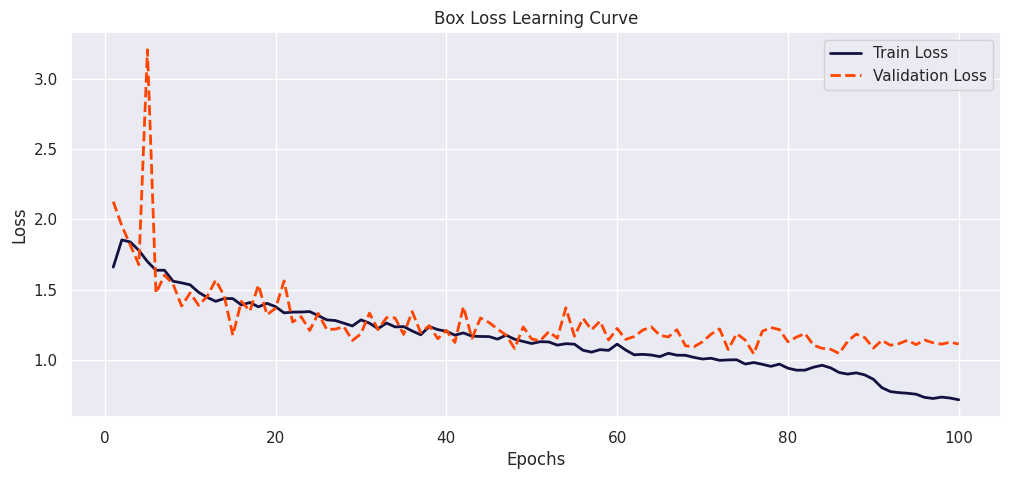

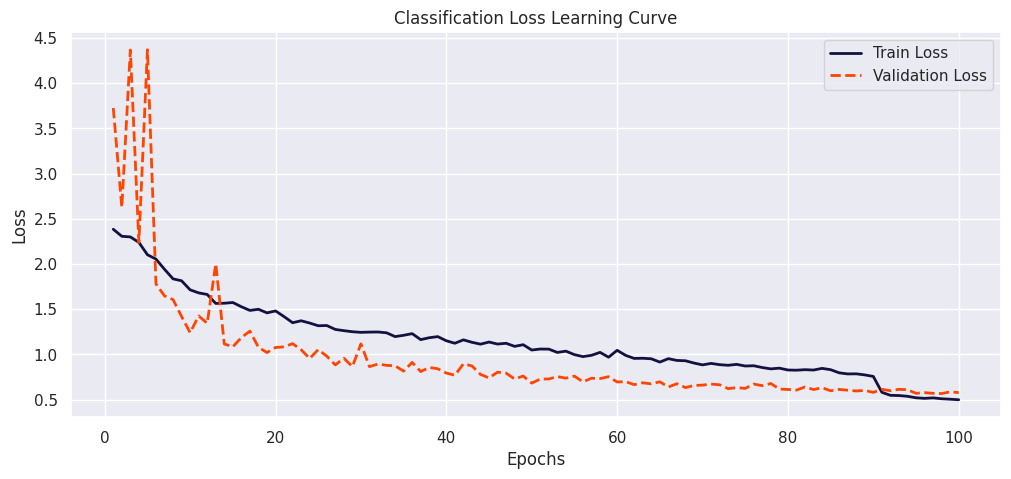

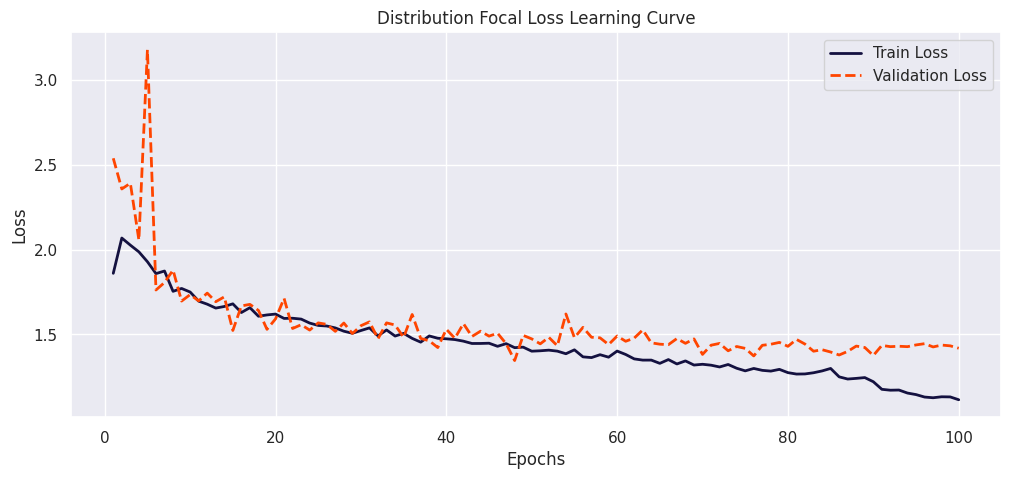

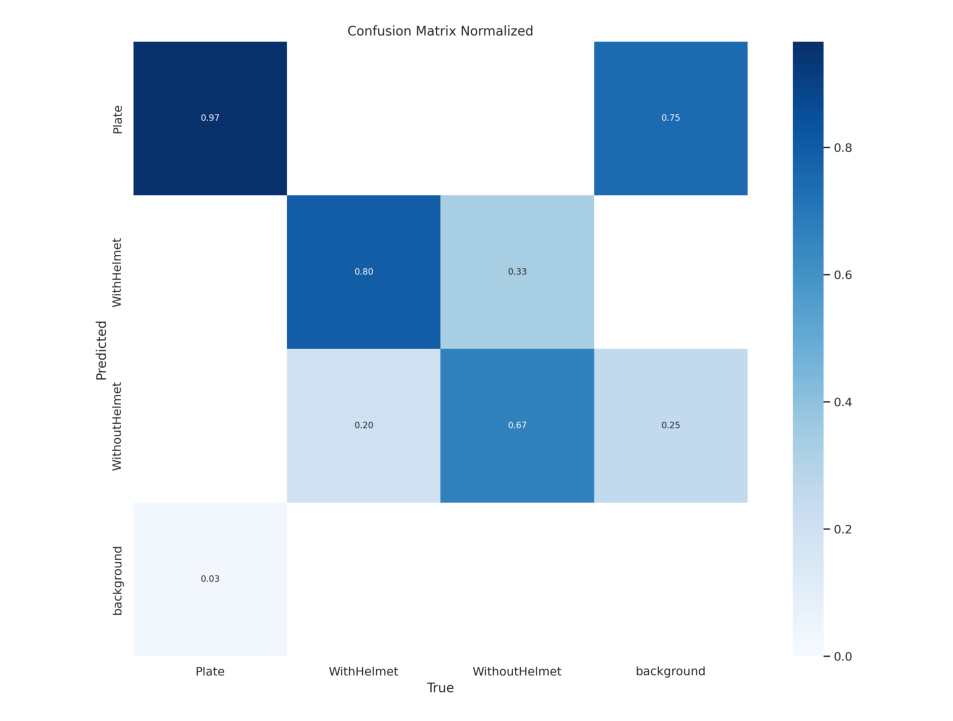

Ultralytics 8.3.47 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


val: Scanning /kaggle/input/helmet/HelmetViolationsV2/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 238.94it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


                   all         30         38      0.798      0.913      0.911      0.661
                 Plate         30         30      0.925      0.967      0.983      0.651
            WithHelmet          5          5      0.726        0.8       0.92      0.679
         WithoutHelmet          3          3      0.743      0.973       0.83      0.654
Speed: 0.3ms preprocess, 70.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


,Metric Value
metrics/precision(B),0.798
metrics/recall(B),0.913
metrics/mAP50(B),0.911
metrics/mAP50-95(B),0.661
fitness,0.686


In [8]:

# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off') 
plt.show()
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path )

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFram
metrics_df.round(3)


0: 640x640 1 Plate, 98.8ms
Speed: 3.2ms preprocess, 98.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 69.4ms
Speed: 1.5ms preprocess, 69.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 60.2ms
Speed: 1.6ms preprocess, 60.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 59.8ms
Speed: 1.6ms preprocess, 59.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 59.8ms
Speed: 1.9ms preprocess, 59.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 1 WithoutHelmet, 60.1ms
Speed: 2.3ms preprocess, 60.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 59.7ms
Speed: 1.8ms preprocess, 59.7ms inference, 1.3ms postprocess per image a

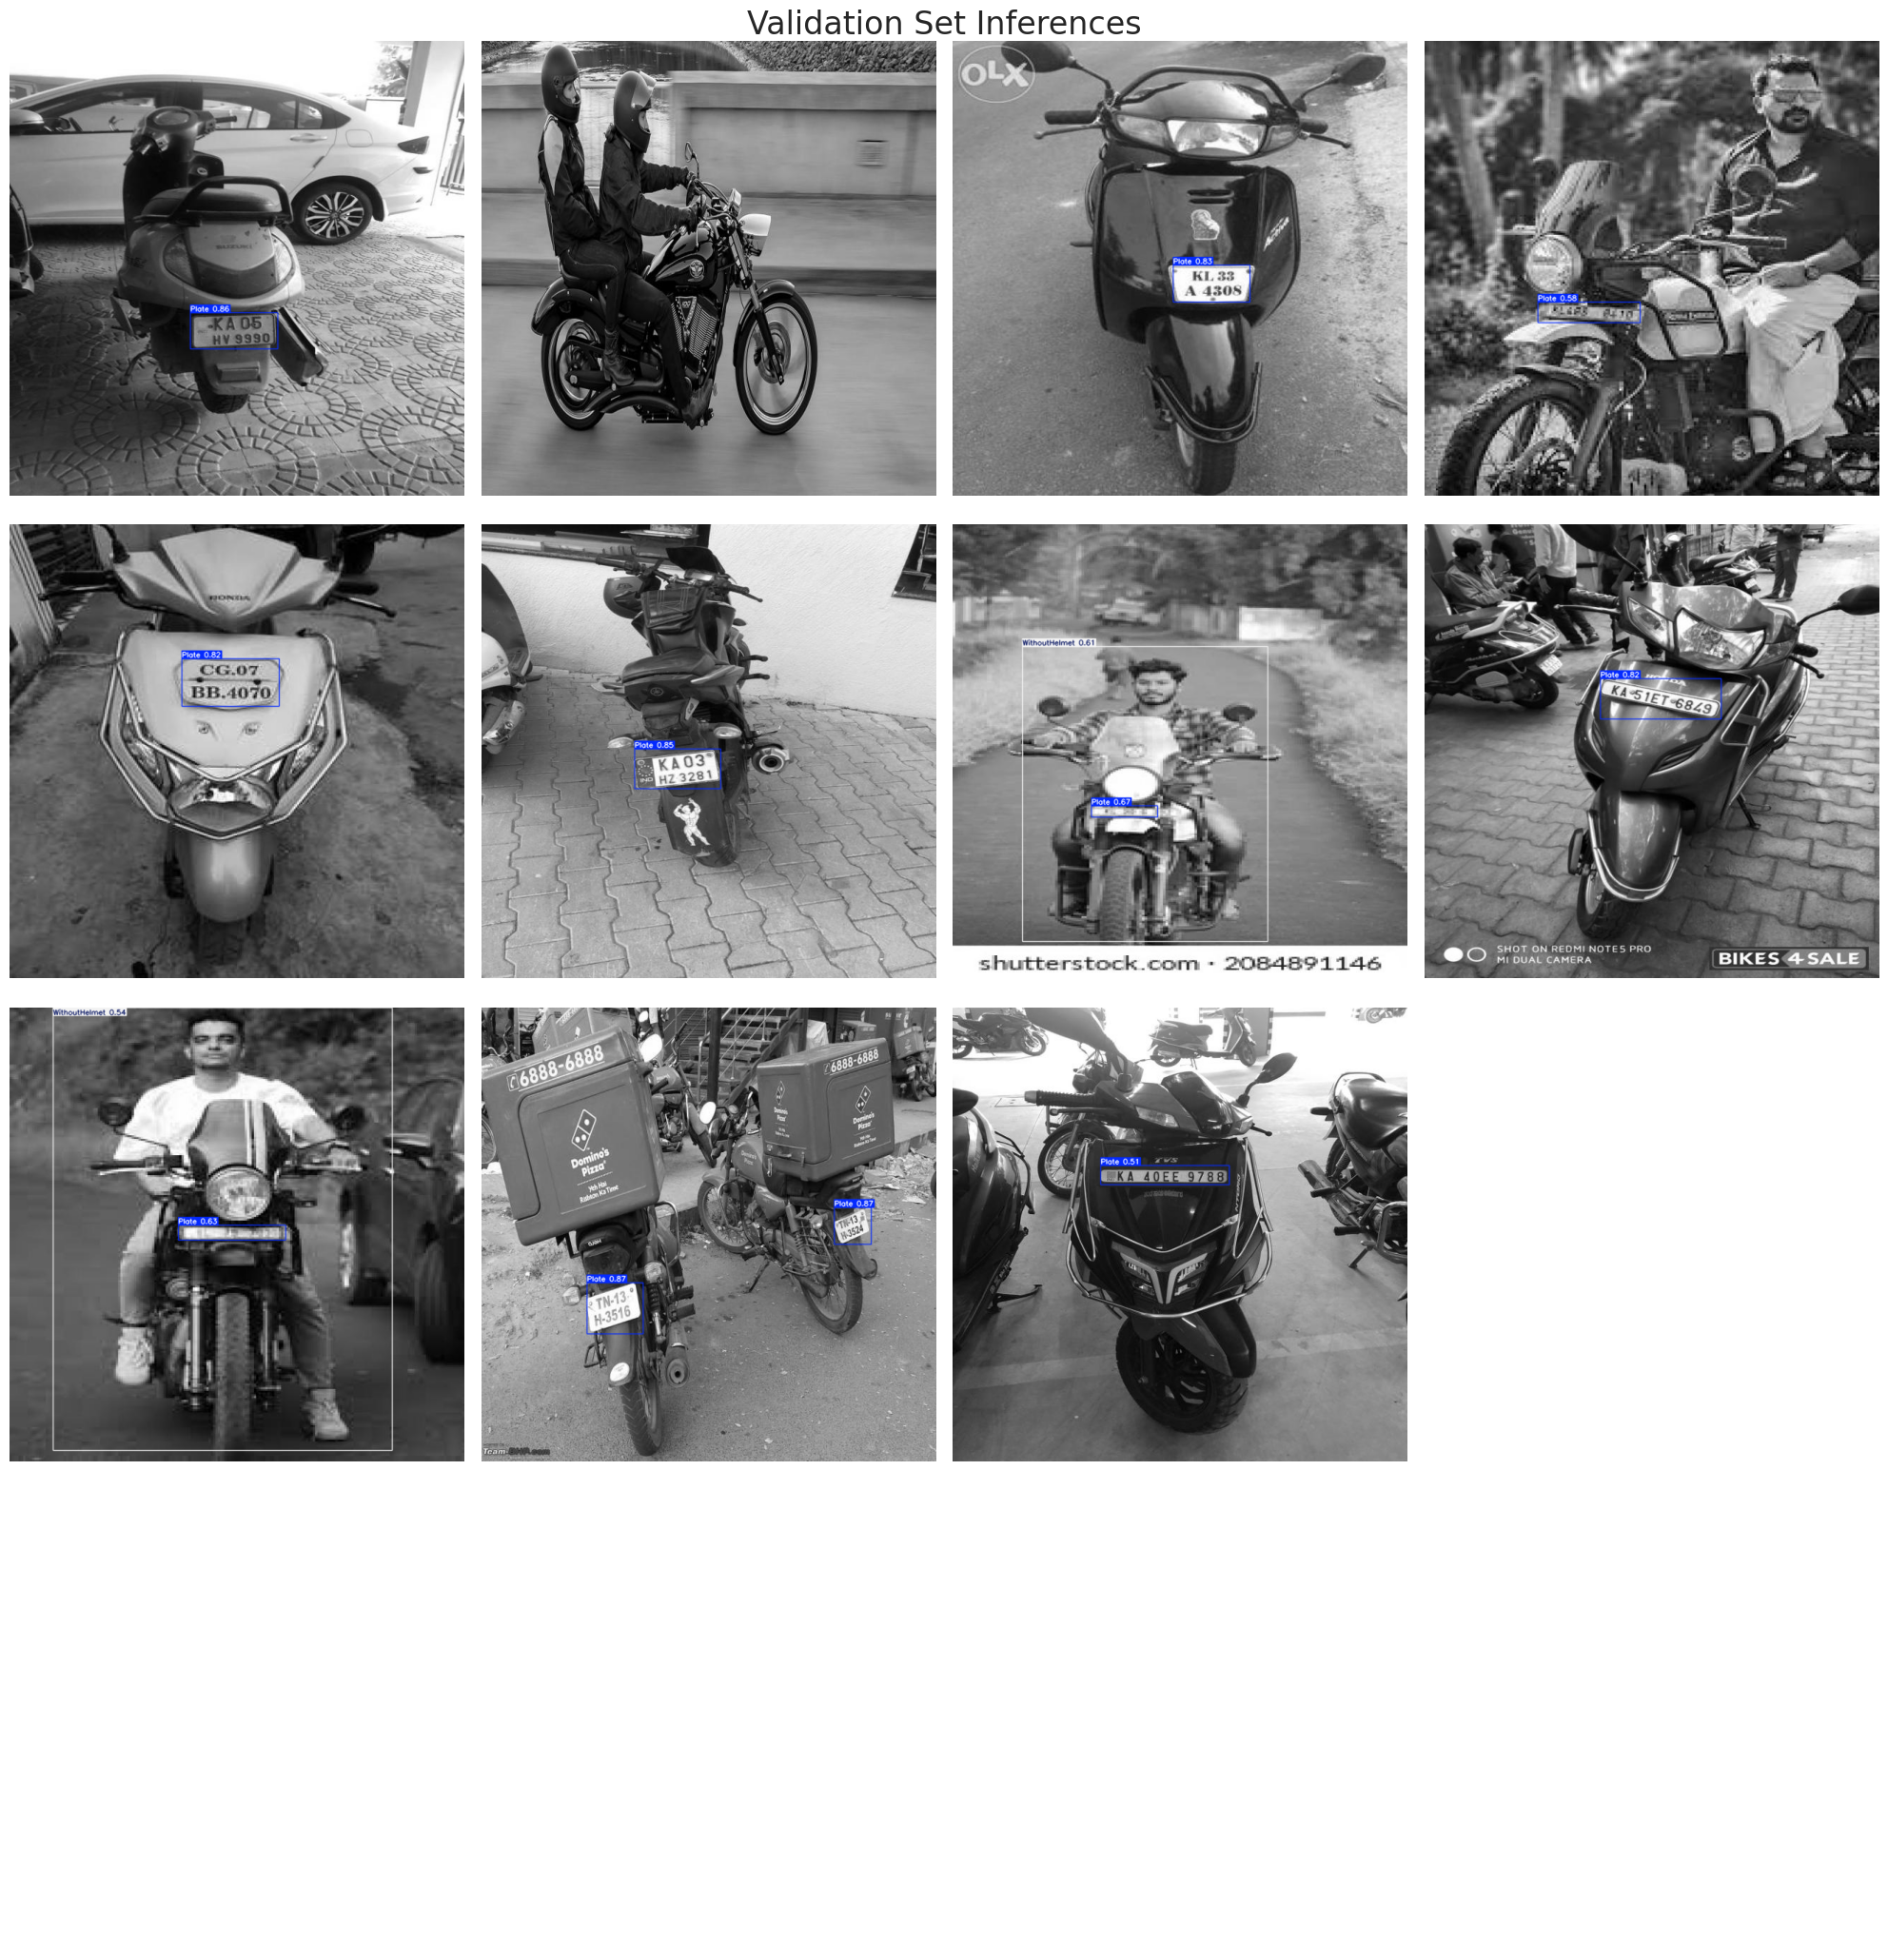

In [9]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/helmet/HelmetViolationsV2'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 15)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

